In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings('ignore')
#import standardscalar
from sklearn.preprocessing import StandardScaler

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
import os

# Set dataset paths (update as needed)
train_path = r'C:/Users/priya/OneDrive/Desktop/greenAI/day-10/lab-4/train'
test_path = r'C:/Users/priya/OneDrive/Desktop/greenAI/day-10/lab-4/test'

In [3]:
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 12565/12565 [01:26<00:00, 145.50it/s]

100%|██████████| 9999/9999 [01:05<00:00, 151.71it/s]



In [4]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

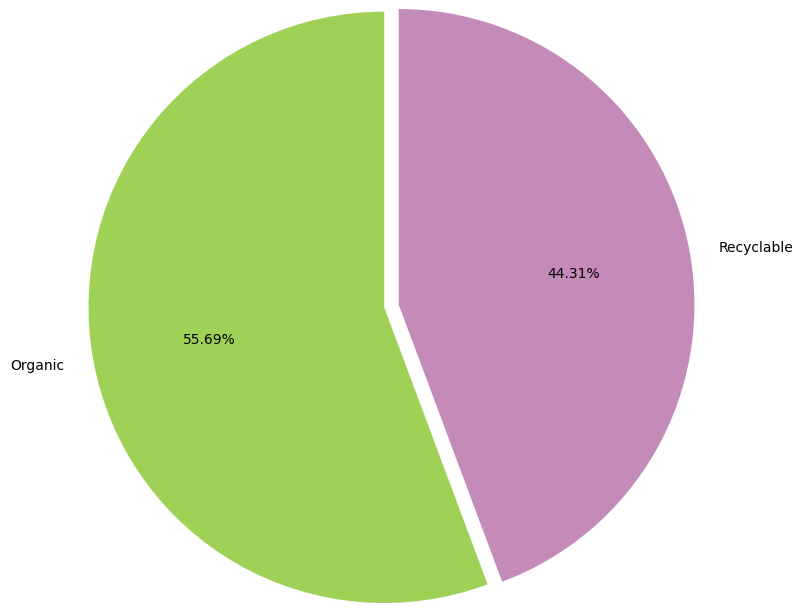

In [5]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05,0.05], autopct='%0.2f%%',
    labels=['Organic', 'Recyclable'], colors= colors, radius=2)
plt.show()

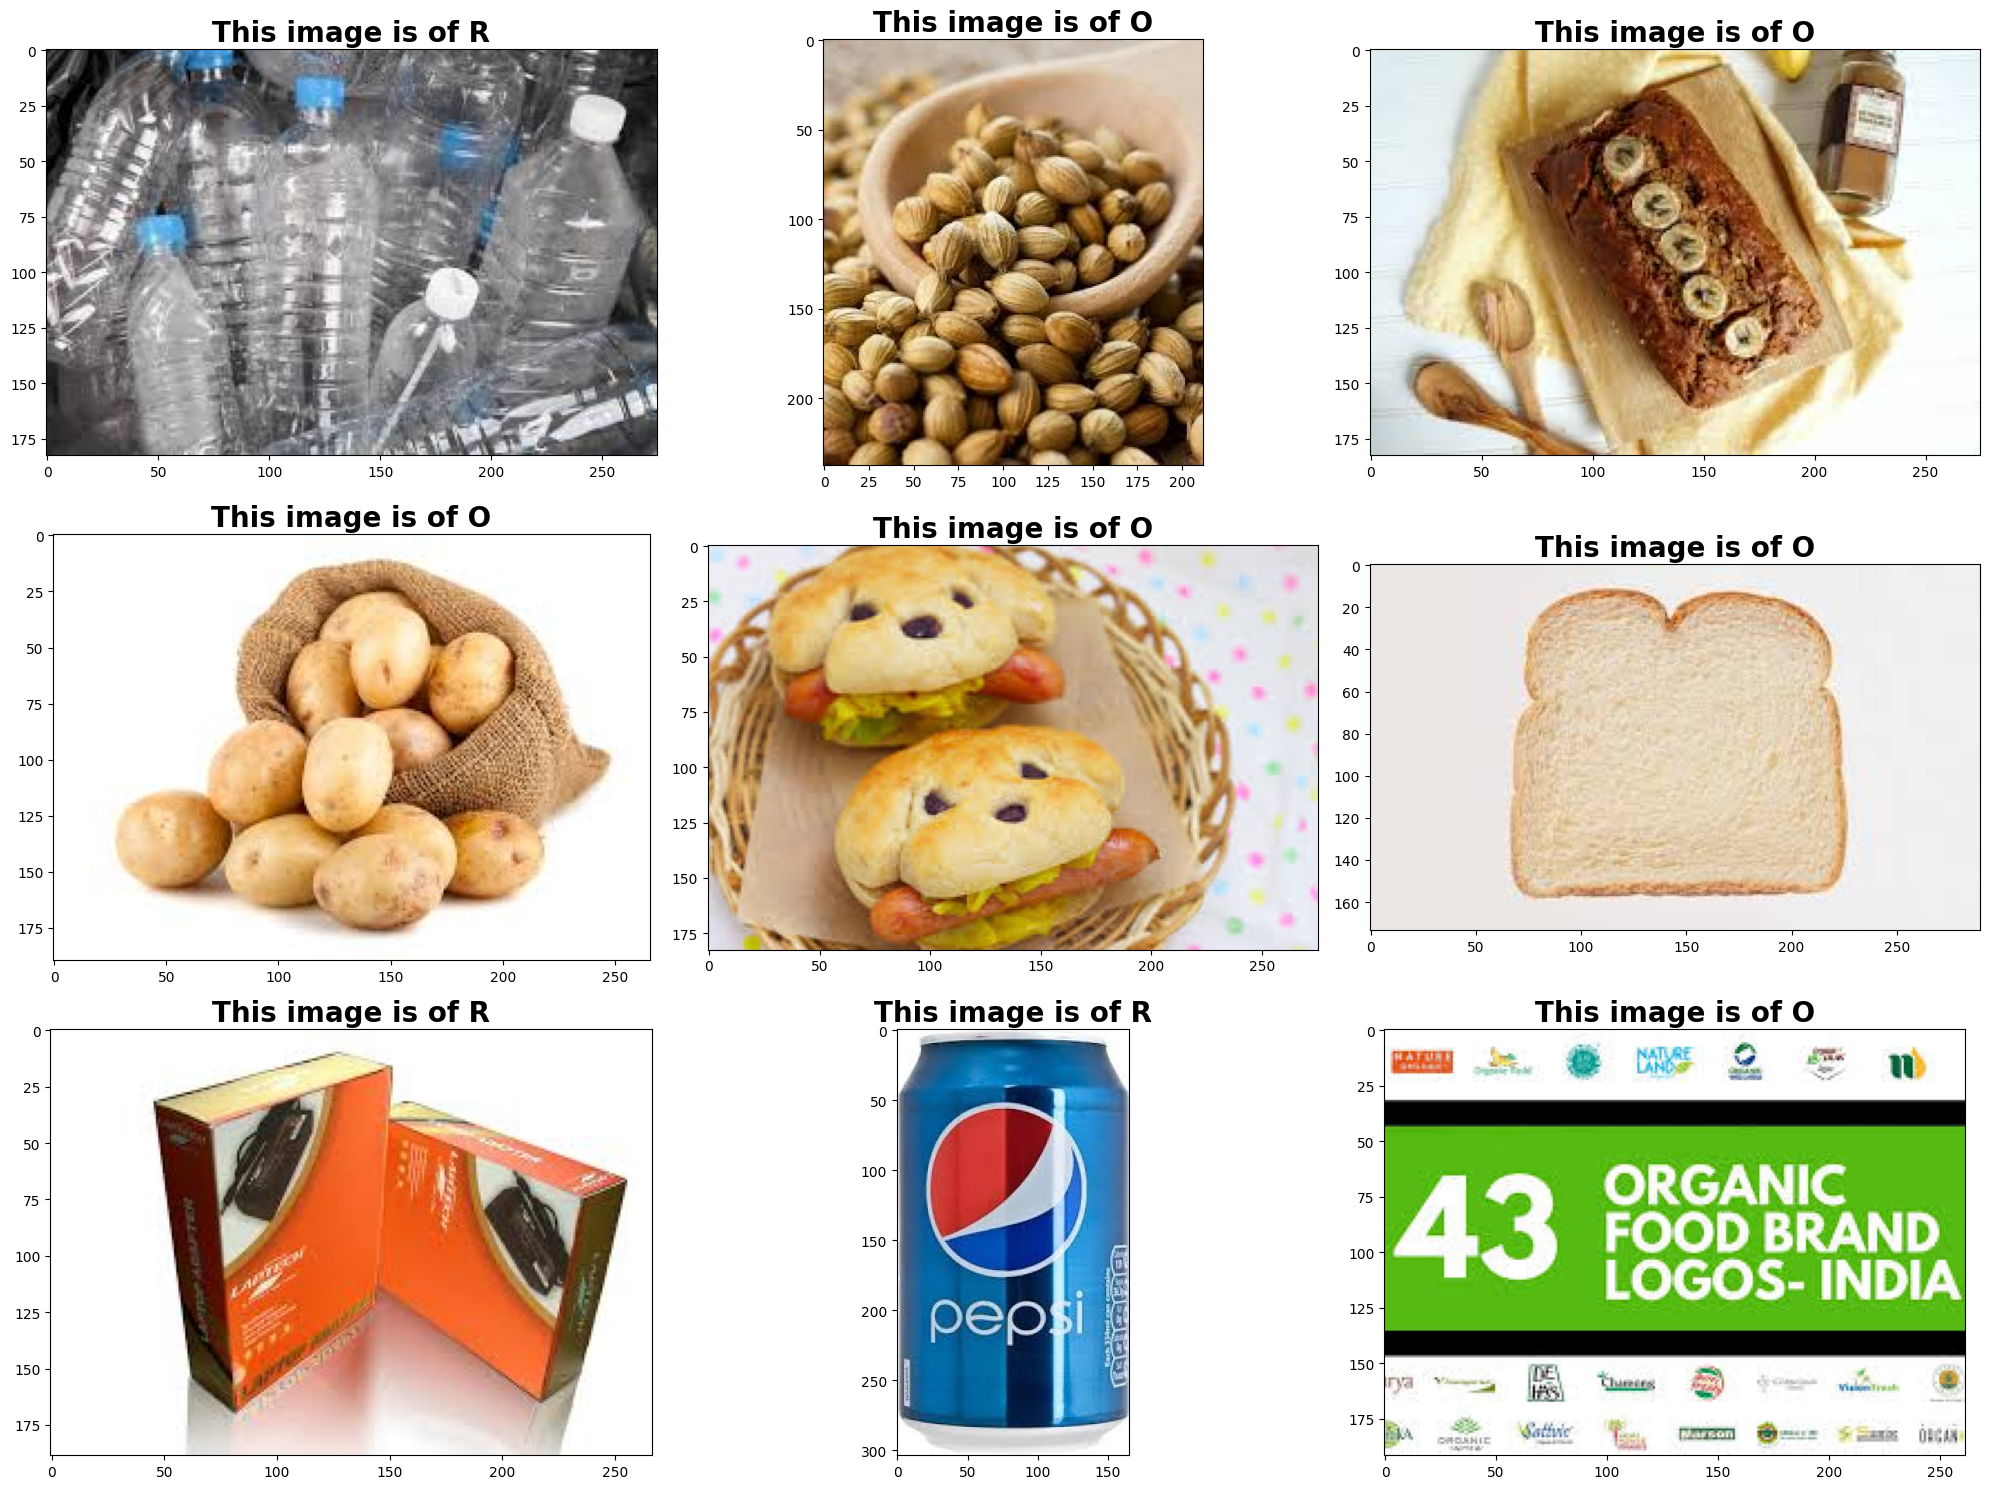

In [6]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    index = np.random.randint(len(data))
    plt.title(f'This image is of {data.label[index]}', fontdict={'size': 20, 'weight': 'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [12]:
from sklearn.model_selection import train_test_split

# The following code is not needed for CNNs using ImageDataGenerator
# X = np.array([img.flatten() for img in data['image']])
# y = data['label'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Data will be loaded using ImageDataGenerator and flow_from_directory

In [13]:
className = glob (train_path + '/*')
numberOfClass = len(className)
print("Number Of Class: ", numberOfClass)

Number Of Class:  2


In [15]:
model = Sequential()


In [16]:
model.add(Conv2D (32, (3,3), input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D (64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

In [17]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

In [18]:
model.compile(loss = "categorical_crossentropy",
optimizer = "adam",
metrics = ["accuracy"])
batch_size = 32

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [20]:
train_datagen = ImageDataGenerator (rescale= 1./255)
test_datagen = ImageDataGenerator (rescale= 1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
train_path,
target_size= (224,224),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
test_path,
target_size= (224,224),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
train_generator,
# Pass the generator directly
epochs=10,
validation_data=test_generator
# Validation data generator
)

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    class_labels = list(train_generator.class_indices.keys())
    print(f"This image -> {class_labels[result]}")